In [77]:
import math
import numpy as np
from scipy.optimize import fsolve
import sympy as sy

In [34]:
pip install sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 15.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [sympy]32m1/2 [sympy]
Note: you may need to restart the kernel to use updated packages.


# Initialize Scenario 1 and 2 Parameters for Hillslopes A and B

In [78]:
hillslopeA = True
scenario1 = False
hillslopeB = not(hillslopeA)
scenario2 = not(scenario1)


# Hillslope Parameterizations for Scenario 1, hillslope A:
Bx = 100                                          # slope length, in m
theta = 0.1                                       # slope angle, in deg
k0 = 1000                                         # hydraulic conductivity (in m/d)
ne = 0.08                                         # drainable porosity
eta0 = 0.67                                       # mean water table height, in m
tstar = Bx*ne/(k0*math.sin(math.radians(theta)))  # response timescale, in days (this one should work out to 4.58)
H_i = 0.26                                        # hillslope number


if hillslopeB and scenario1:
    Bx = 100
    theta = 6
    k0 = 86.4
    ne = 0.34
    eta0 = 0.67
    tstar = Bx*ne/(k0*math.sin(math.radians(theta))) # should be 3.76
    H_i = 15.78
elif hillslopeA and scenario2:
    Bx = 300
    theta = 0.1
    k0 = 230
    ne = 0.15
    eta0 = 0.67
    tstar = Bx*ne/(k0*math.sin(math.radians(theta))) # should be 112.10
    H_i = 0.78
elif hillslopeB and scenario2:
    Bx = 300
    theta = 6
    k0 = 8.64
    ne = 0.34
    eta0 = 0.67
    tstar = Bx*ne/(k0*math.sin(math.radians(theta))) # should be 112.94
    H_i = 47.29


In [79]:
# make Bx*10 steps across the domain from x=0 to x=Bx
x = np.linspace(0, Bx, Bx*10)
nt = 1000                      # number of time steps

alpha = 0     # i.e. no recharge in half of the hillslope
xr = 50       # in m (note: this is half of Bx when looking at Scenario 1)
gamma = 0
td = 2        # in days

Rmax = 7.2    # in cm/days

H_i = Bx*math.tan(math.radians(theta))/eta0 # should be about 0.26, as already established for hillslope A, Scenario 1

a = -H_i**2/4
b = -H_i/2


# For Scenario 2, Hillslope A:


In [211]:
D = 1.5     # in m, eta(0) = D = 1.5
td = 1000

nt = 1000

eta = np.zeros((Bx*10, td))
for i in range(len(eta)):
    eta[i] = D

eta_new = np.zeros_like(eta)

dx = Bx/(Bx*10 - 1)
dt = 1


# establish R(x, t) = N(x)*M(t)
R = np.zeros((Bx, td))

for x in range(0, Bx):
    if x < xr :
        N = alpha
    else:
        N = 1
    for t in range(0, td):
        if t <= td:
            M = 1
        else:
            M = gamma

        R[x, t] = Rmax*N*M

t = 0

print(R)

# for n in range(nt):
for n in range(2):
    x = i // 10
    t = n

    # for i in range(1, Bx*10-1):
    for i in range(1, 10):
        print(dt)
        print(k0)
        print(eta0)
        print(math.cos(math.radians(theta)))
        print(ne)
        # print(eta[i + 1])
        # print(eta[i])
        # print(eta[i-1])
        print(dx)
        print(dx**2)
        print(math.sin(math.radians(theta)))
        print(R[x,t])
        eta_new[i] = dt * ((k0 * eta0 * math.cos(math.radians(theta))/ne) * (eta[i + 1] - 2 * eta[i] + eta[i - 1])/dx**2 +
                     k0 * math.sin(math.radians(theta))/ne * (eta[i] - eta[i - 1])/dx + R[x, t]/ne)
        # print(eta_new[i])
    print(eta_new.shape)
    print(eta[:n].shape)
    # eta[:n] = eta_new

print(eta.shape)
print(eta[:1].shape)
print(eta)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.01
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.01000667

In [213]:
D = 1.5     # in m, eta(0) = D = 1.5
td = 1000

nt = 1000

eta = np.zeros((td, Bx*10))
for i in range(len(eta)):
    eta[i] = D

eta_new = np.zeros_like(eta)

dx = Bx/(Bx*10 - 1)
dt = 1


# establish R(x, t) = N(x)*M(t)
R = np.zeros((Bx, td))

for x in range(0, Bx):
    if x < xr :
        N = alpha
    else:
        N = 1
    for t in range(0, td):
        if t <= td:
            M = 1
        else:
            M = gamma

        R[x, t] = Rmax*N*M

t = 0

print(R)

# for n in range(nt):
for n in range(2):
    x = i // 10
    t = n

    # for i in range(1, Bx*10-1):
    for i in range(1, 10):
        print(dt)
        print(k0)
        print(eta0)
        print(math.cos(math.radians(theta)))
        print(ne)
        # print(eta[i + 1])
        # print(eta[i])
        # print(eta[i-1])
        print(dx)
        print(dx**2)
        print(math.sin(math.radians(theta)))
        print(R[x,t])
        eta_new[i] = dt * ((k0 * eta0 * math.cos(math.radians(theta))/ne) * (eta[i + 1] - 2 * eta[i] + eta[i - 1])/dx**2 +
                     k0 * math.sin(math.radians(theta))/ne * (eta[i] - eta[i - 1])/dx + R[x, t]/ne)
        # print(eta_new[i])
    print(eta_new.shape)
    print(eta[:n].shape)
    # eta[:n] = eta_new

print(eta.shape)
print(eta[:1].shape)
print(eta)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]
 [0.01 0.01 0.01 ... 0.01 0.01 0.01]]
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.0100066700014821
3.046174197395986e-05
0.0
1
230
0.67
0.9999999995360411
0.15
0.10003334444814939
0.010006670001482

In [214]:
eta


array([[1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       ...,
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5],
       [1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5]], shape=(1000, 3000))

In [83]:
print(eta.shape)

(1000, 3000)


In [84]:
len(eta)

1000

In [85]:
eta[:1]

array([[1.5, 1.5, 1.5, ..., 1.5, 1.5, 1.5]], shape=(1, 3000))

In [86]:
eta[:1].shape

(1, 3000)

In [215]:
import numpy as np
from matplotlib import pyplot as plt

Bx = 300    # m
xr = 150    # m
Rmax = 1    # cm/d
Rmax = 0.01 # m/d
D = 1.5     # m
# theta = 0.1
# k0 = 230
# ne = 0.15
eta0 = 0.67
alpha = 0

theta = 6
k0 = 8.64
ne = 0.34

# dx = 0.1
dx = 1

numPoint = int(Bx/dx + 1)

# Bx*10+1 points to cover from 0 to Bx
x = np.linspace(0, Bx, numPoint)

h = np.zeros(numPoint)

R = np.zeros(numPoint)

for i in range(0, numPoint):
    if i < xr :
        N = alpha
    else:
        N = 1
    M = 1
    R[i] = Rmax*N*M

# initial condition
for i in range(len(x)):
    h[i] = D




for t in range(10):
    for i in range(1, len(x) - 1):
        #h[i] += ((k0 * eta0 * math.cos(math.radians(theta))/ne) * (h[i + 1] - 2 * h[i] + h[i - 1])/dx**2 +
        #         k0 * math.sin(math.radians(theta))/ne * (h[i] - h[i - 1])/dx + R[i]/ne)
        h[i] += ( k0 * eta0 * math.cos(math.radians(theta))/ne * (h[i+1] - 2*h[i] + h[i-1])/(dx**2) +
                  k0 * math.sin(math.radians(theta))/ne * (h[i] - h[i - 1])/dx
                  + R[i]/ne
                )
        
        print(str(i) + ": " + str(h[i]))
    h[0] = 0

print(h)



1: 1.5
2: 1.5
3: 1.5
4: 1.5
5: 1.5
6: 1.5
7: 1.5
8: 1.5
9: 1.5
10: 1.5
11: 1.5
12: 1.5
13: 1.5
14: 1.5
15: 1.5
16: 1.5
17: 1.5
18: 1.5
19: 1.5
20: 1.5
21: 1.5
22: 1.5
23: 1.5
24: 1.5
25: 1.5
26: 1.5
27: 1.5
28: 1.5
29: 1.5
30: 1.5
31: 1.5
32: 1.5
33: 1.5
34: 1.5
35: 1.5
36: 1.5
37: 1.5
38: 1.5
39: 1.5
40: 1.5
41: 1.5
42: 1.5
43: 1.5
44: 1.5
45: 1.5
46: 1.5
47: 1.5
48: 1.5
49: 1.5
50: 1.5
51: 1.5
52: 1.5
53: 1.5
54: 1.5
55: 1.5
56: 1.5
57: 1.5
58: 1.5
59: 1.5
60: 1.5
61: 1.5
62: 1.5
63: 1.5
64: 1.5
65: 1.5
66: 1.5
67: 1.5
68: 1.5
69: 1.5
70: 1.5
71: 1.5
72: 1.5
73: 1.5
74: 1.5
75: 1.5
76: 1.5
77: 1.5
78: 1.5
79: 1.5
80: 1.5
81: 1.5
82: 1.5
83: 1.5
84: 1.5
85: 1.5
86: 1.5
87: 1.5
88: 1.5
89: 1.5
90: 1.5
91: 1.5
92: 1.5
93: 1.5
94: 1.5
95: 1.5
96: 1.5
97: 1.5
98: 1.5
99: 1.5
100: 1.5
101: 1.5
102: 1.5
103: 1.5
104: 1.5
105: 1.5
106: 1.5
107: 1.5
108: 1.5
109: 1.5
110: 1.5
111: 1.5
112: 1.5
113: 1.5
114: 1.5
115: 1.5
116: 1.5
117: 1.5
118: 1.5
119: 1.5
120: 1.5
121: 1.5
122: 1.5
123: 1.5
1

/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_1312/1744769646.py:50: RuntimeWarning: overflow encountered in scalar multiply
  h[i] += ( k0 * eta0 * math.cos(math.radians(theta))/ne * (h[i+1] - 2*h[i] + h[i-1])/(dx**2) +
/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_1312/1744769646.py:50: RuntimeWarning: invalid value encountered in scalar add
  h[i] += ( k0 * eta0 * math.cos(math.radians(theta))/ne * (h[i+1] - 2*h[i] + h[i-1])/(dx**2) +


In [88]:
print(R)

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 

In [89]:
ne

0.34

In [90]:
R/ne

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [216]:
# Dimensionless Attempt
import numpy as np
from matplotlib import pyplot as plt

Bx = 300    # m
xr = 150    # m
Rmax = 1    # cm/d
Rmax = 0.01 # m/d
D = 1.5     # m
# theta = 0.1
# k0 = 230
# ne = 0.15
eta0 = 0.67
alpha = 0

theta = 6
k0 = 8.64
ne = 0.34

# dx = 0.1
dx = 1

numPoint = 300

# Bx*10+1 points to cover from 0 to Bx
x = np.linspace(0, 1, numPoint)

h = np.zeros(numPoint)

R = np.zeros(numPoint)

H_i = Bx*math.tan(math.radians(theta))/eta0
H_r = Bx**2*Rmax/(D*k0*eta0*math.cos(math.radians(theta)))

for i in range(0, numPoint):
    if i < xr :
        N = alpha
    else:
        N = 1
    M = 1
    # R[i] = Rmax*N*M
    R[i] = N*M

# initial condition
for i in range(len(x)):
    h[i] = 1


print(H_r)

for t in range(2):
    for i in range(1, len(x) - 1):
        #h[i] += ((k0 * eta0 * math.cos(math.radians(theta))/ne) * (h[i + 1] - 2 * h[i] + h[i - 1])/dx**2 +
        #         k0 * math.sin(math.radians(theta))/ne * (h[i] - h[i - 1])/dx + R[i]/ne)
        h[i] += (h[i+1] - 2*h[i] + h[i-1])/(dx**2) + H_i * (h[i] - h[i - 1])/dx + H_r*R[i]
        
        # if h[i] > 1000:
        print(str(i) + ": " + str(h[i]))
    h[0] = 0

print(h)



104.21934904265301
1: 1.0
2: 1.0
3: 1.0
4: 1.0
5: 1.0
6: 1.0
7: 1.0
8: 1.0
9: 1.0
10: 1.0
11: 1.0
12: 1.0
13: 1.0
14: 1.0
15: 1.0
16: 1.0
17: 1.0
18: 1.0
19: 1.0
20: 1.0
21: 1.0
22: 1.0
23: 1.0
24: 1.0
25: 1.0
26: 1.0
27: 1.0
28: 1.0
29: 1.0
30: 1.0
31: 1.0
32: 1.0
33: 1.0
34: 1.0
35: 1.0
36: 1.0
37: 1.0
38: 1.0
39: 1.0
40: 1.0
41: 1.0
42: 1.0
43: 1.0
44: 1.0
45: 1.0
46: 1.0
47: 1.0
48: 1.0
49: 1.0
50: 1.0
51: 1.0
52: 1.0
53: 1.0
54: 1.0
55: 1.0
56: 1.0
57: 1.0
58: 1.0
59: 1.0
60: 1.0
61: 1.0
62: 1.0
63: 1.0
64: 1.0
65: 1.0
66: 1.0
67: 1.0
68: 1.0
69: 1.0
70: 1.0
71: 1.0
72: 1.0
73: 1.0
74: 1.0
75: 1.0
76: 1.0
77: 1.0
78: 1.0
79: 1.0
80: 1.0
81: 1.0
82: 1.0
83: 1.0
84: 1.0
85: 1.0
86: 1.0
87: 1.0
88: 1.0
89: 1.0
90: 1.0
91: 1.0
92: 1.0
93: 1.0
94: 1.0
95: 1.0
96: 1.0
97: 1.0
98: 1.0
99: 1.0
100: 1.0
101: 1.0
102: 1.0
103: 1.0
104: 1.0
105: 1.0
106: 1.0
107: 1.0
108: 1.0
109: 1.0
110: 1.0
111: 1.0
112: 1.0
113: 1.0
114: 1.0
115: 1.0
116: 1.0
117: 1.0
118: 1.0
119: 1.0
120: 1.0
121: 1.0


/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_1312/648703539.py:55: RuntimeWarning: overflow encountered in scalar multiply
  h[i] += (h[i+1] - 2*h[i] + h[i-1])/(dx**2) + H_i * (h[i] - h[i - 1])/dx + H_r*R[i]
/var/folders/zn/fbx3h9w10m1ff_g3y0gg08lw0000gq/T/ipykernel_1312/648703539.py:55: RuntimeWarning: invalid value encountered in scalar add
  h[i] += (h[i+1] - 2*h[i] + h[i-1])/(dx**2) + H_i * (h[i] - h[i - 1])/dx + H_r*R[i]


In [120]:
# exact solution with infinite series

theta = math.pi/30
Bx = 300
eta0 = 0.67
H_i = Bx*math.tan(theta)/eta0

lambdaVals = np.zeros(1000)

# for m in range(1000):
    

In [312]:
eta0

0.67

In [313]:
# Trying to find transcendental roots

def func(x):
    return math.tan(x[0]) + 2*x[0]/(300 * math.tan(math.pi/30)/eta0)

root = fsolve(func, [math.pi])

root

# the above returns array([3.01419089]) so I think it works

array([3.01419089])

In [314]:
# Finding the first 1000 transcendental roots:

transcendental_lambda_m = []
for m in range(1000):
    # note that the transcendental roots converge to (2m-1)pi/2 as m -> infinity
    if m > 10:
        near = (2*m - 1)*math.pi/2
    else:
        near = m*math.pi
    root = fsolve(func, [near])
    transcendental_lambda_m.append(root[0])

max_diff = 0
min_diff = 10000000
max_index = 0
min_index = 0
for i in range(len(transcendental_lambda_m)):
    # print(str(i) + ": " + str(transcendental_lambda_m[i]))
    if i > 0:
        diff = transcendental_lambda_m[i] - transcendental_lambda_m[i - 1]

        if diff < min_diff:
            min_index = i
        if diff > max_index:
            max_index = i
        min_diff = min(diff, min_diff)
        max_diff = max(diff, max_diff)

print("min diff: " + str(min_diff))
print("min diff index: " + str(min_index))
print("max diff: " + str(max_diff))
print("max diff index: " + str(max_index))

min diff: 2.4845075591522665
min diff index: 11
max diff: 3.1415927004040896
max diff index: 4


In [129]:
# def phi(x, lambda_m):
#     return math.sin(lambda_m * x[0]) 

# eigenfunc_phi_m = []
# for m in range(1000):
#     eigenfunc_phi_m.append(phi(

Bx = 300
theta = math.radians(0.1)
k0 = 230
ne = 0.15
eta0 = 0.67

H_i = 0.78

a = -H_i**2/4
b = -H_i/2

from sympy import symbols, sin, integrate
from scipy.integrate import quad

# Finding coefficients C_n:
# def f1(x, lambda_m):
#     return math.exp(-b * x)*math.sin(lambda_m * x)

# symbolic integration
def f2sym(x, lambda_m):
    return sin(lambda_m * x)*sin(lambda_m * x)

# numerical integration
def f2(x, lambda_m):
    return np.sin(lambda_m * x) * np.sin(lambda_m * x)

def f1(x, lambda_m):
    return np.exp(-b * x) * np.sin(lambda_m * x)


x = sy.Symbol("x")
result, error = quad(f2, 0, 1, math.pi)
# print(result)
# print(sy.integrate(f2sym(x, math.pi), (x, 0, 1)))

result_numer, error_numer = quad(f1, 0, 1, 1*math.pi)
result_denom, error_denom = quad(f2, 0, 1, 1*math.pi)

print(result_numer)
print(result_denom)


phi_squared_int = 0.5 # integrating phi_n^2 over x in [0,1]

0.7764811606595439
0.5


In [54]:
b

-23.530798940076817

In [130]:
a

-0.1521

In [55]:
error_numer

0.0035248463773314143

In [60]:
f1(0.05, math.pi)

np.float64(0.5073378312651577)

In [61]:
H_i

47.061597880153634

In [193]:
# determine the coefficients C_n (the ICs for the c_n(t) functions)

list_C_n = []

for n in range(1000):
    result_numer, error_numer = quad(f1, 0, 1, transcendental_lambda_m[n], limit = 1000)
    C_n = result_numer/phi_squared_int
    list_C_n.append(C_n)


# print(list_C_n)

# ok so the C_n coefficients seem to go to 0 as n grows
# good. I think. So maybe doing 1000 is sufficient

In [132]:
H_r = Bx**2 * Rmax/(D * k0 * eta0 * math.cos(theta))
H_r

R = np.zeros(Bx)
xr = 150

for i in range(len(R)):
    if i >= xr:
        R[i] = Rmax

# R

In [176]:

def G_numer_integrand(x, t, lambda_n):
    # since integrating x from 0 to 1 but we need a value for R
    x_ind = round(299*x)
    return H_r*R[x_ind]/np.exp(a * t + b * x)*np.sin(lambda_n * x)

def G(t, lambda_n):
    results, error = quad(G_numer_integrand, 0, 1, args = (t, lambda_n,))
    return results/phi_squared_int

def integrandf(tau, lambda_n):
    return G(tau, lambda_n)*np.exp(lambda_n**2 * tau)

def cn(t, n):
    lambda_n = transcendental_lambda_m[n - 1]
    C_n = list_C_n[n - 1]

    results, error = quad(integrandf, 0, t, args = (lambda_n,))
    return np.exp(-lambda_n**2 * t) * (C_n + results)

In [177]:
# cn(2, 2)

# print(G_numer_integrand(1, 2, 2))
a = G_numer_integrand(1, 2, 2)
print(a)

0.04754781630646582


In [178]:
quad(G_numer_integrand, 0, 1, args = (2, 2))

(0.02274498187313968, 2.5326962749261384e-16)

In [179]:
print(a)

0.04754781630646582


In [180]:
cn(2, 2)

np.float64(0.0036039079396416535)

In [188]:
print(cn(2, 2))

0.0036039079396416535


In [191]:
print(cn(0.5, 8))

5.529238379795513e-06


In [227]:
# now determining the eta function
def eta2(x, t):
    trunc_inf_sum = 0

    # print(np.exp(a * t + b * x))
    for n in range(1, 10):
        lambda_n = transcendental_lambda_m[n]
        term_n = cn(t, n)*np.sin(lambda_n * x)

        # print(str(n) + ": " + str(term_n))
        
        trunc_inf_sum += term_n
        
    return np.exp(a * t + b * x)*trunc_inf_sum

print(eta2(0.1,0))

1.5804185650427829


In [268]:

xvals = []
etavals = []

for i in range(300):
    xval = i/300
    xvals.append(xval)
    tval = 1
    etaval = eta2(xval, tval)
    etavals.append(etaval)
    # print(str(i) + ": " + str(eta(xval, tval)))

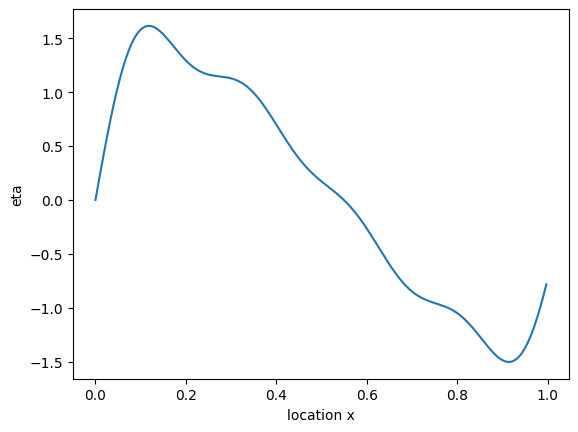

In [229]:
plt.plot(xvals, etavals)
plt.xlabel('location x')
plt.ylabel('eta')
plt.show()

In [237]:
# Other derivation with capital phi

N = np.zeros(Bx)
for i in range(len(N)):
    if i >= xr:
        N[i] = 1
    else:
        N[i] = alpha

def cap_phi_integrand(x, lambda_n):
    x_ind = round(x*299)
    # print(str(x_ind) + ": " + str(N[x_ind]))
    return H_r*N[x_ind]*np.exp(-b*x)*np.sin(lambda_n*x)


result, error = quad(cap_phi_integrand, 0, 1, args = (3*math.pi))

cap_phi_n = result/phi_squared_int
print(cap_phi_n)

33.71943030317263


In [261]:
cap_phi_list = []

for lambda_n in transcendental_lambda_m:
    result, error = quad(cap_phi_integrand, 0, 1, args = (lambda_n), limit = 200)

    cap_phi_n = result/phi_squared_int

    cap_phi_list.append(cap_phi_n)


# print(cap_phi_list) # as n -> infinity, these coefficients go to 0 and oscillate btwn pos and neg


In [256]:
def cn_integrand_2(tau, lambda_n):
    M = 1
    return M*np.exp(lambda_n**2 * tau - a*tau)


def cn2(t, n): 
    C_n  = list_C_n[n]
    Phi_n = cap_phi_list[n]
    lambda_n = transcendental_lambda_m[n]
    result, error = quad(cn_integrand_2, 0, t, args = (lambda_n))




1.040344387423197


In [316]:
# Hillslope 1, Scenario 2
Bx = 300                                          # slope length, in m
theta = math.radians(0.1)                         # slope angle, in radians
k0 = 230                                          # hydraulic conductivity (in m/d)
ne = 0.15                                         # drainable porosity
eta0 = 0.67                                       # mean water table height, in m
tstar = Bx*ne/(k0*math.sin(math.radians(theta)))  # response timescale, in days (this one should work out to 112.10)
H_i = 0.78                                        # hillslope number


a = -H_i**2/4
b = -H_i/2


# Trying to find transcendental roots

def func_find_lambda_n(x):
    return math.tan(x[0]) + 2*x[0]/(300 * math.tan(theta)/eta0)

# Finding the first 1000 transcendental roots:
transcendental_lambda_n = []
for m in range(1000):
    # note that the transcendental roots converge to (2m-1)pi/2 as m -> infinity
    if m > 0:
        near = (2*m - 1)*math.pi/2
    else:
        near = m*math.pi
    root = fsolve(func_find_lambda_n, [near])
    transcendental_lambda_n.append(root[0])

# print(transcendental_lambda_n)

phi_squared_int = 0.5 # integrating phi_n^2 over x in [0,1]



# Finding coefficients C_n

def f1(x, lambda_m):
    return np.exp(-b * x) * np.sin(lambda_m * x)


list_C_n = []

for n in range(1000):
    result_numer, error_numer = quad(f1, 0, 1, transcendental_lambda_m[n], limit = 1000)
    C_n = result_numer/phi_squared_int
    list_C_n.append(C_n)


# Finding coefficients capital phi_n

N = np.zeros(Bx)
for i in range(len(N)):
    if i >= xr:
        N[i] = 1
    else:
        N[i] = alpha

def cap_phi_integrand(x, lambda_n):
    x_ind = round(x*299)
    # print(str(x_ind) + ": " + str(N[x_ind]))
    return H_r*N[x_ind]*np.exp(-b*x)*np.sin(lambda_n*x)

cap_phi_list = []

for lambda_n in transcendental_lambda_m:
    result, error = quad(cap_phi_integrand, 0, 1, args = (lambda_n), limit = 200)

    cap_phi_n = result/phi_squared_int

    cap_phi_list.append(cap_phi_n)

In [317]:
def cn_givenM(t, lambda_n, n):
    C_n  = list_C_n[n]
    Phi_n = cap_phi_list[n]

    depends_t = (1 - np.exp(a * t - t*lambda_n**2))/(a - lambda_n**2)
    td = 1

    if t > td:
        gamma = 0
        depends_t = ((gamma - 1)*np.exp(-a * td + a * t + td * lambda_n**2 - t * lambda_n**2) + np.exp(a * t - t * lambda_n**2) - gamma)
        depends_t = depends_t/(lambda_n**2 - a)

    prod = np.exp(-a*t)
    prod = prod * (C_n*np.exp(a * t - t * lambda_n**2) - Phi_n*(depends_t))

    cn_t = prod

    return cn_t


def eta2(x, t):
    trunc_inf_sum = 0

    # print(np.exp(a * t + b * x))
    for n in range(1, 1000):
        lambda_n = transcendental_lambda_m[n]
        term_n = cn_givenM(t,lambda_n, n)*np.sin(lambda_n * x)

        # print(str(n) + ": " + str(term_n))
        
        trunc_inf_sum += term_n
        
    return np.exp(a * t + b * x)*trunc_inf_sum

print(eta2(0.1,0))

1.040344387423197


In [318]:
xvals = []
etavals_eq = []
etavals_20days = []
etavals_50days = []
etavals_100days = []

for i in range(300):
    xval = i/300
    xvals.append(xval)
    
    tval_td = 1
    etaval_eq = eta2(xval, tval_td)
    etavals_eq.append(etaval_eq)
    # print(str(i) + ": " + str(etaval))
    tval_20 = 1 + 20/1000
    etaval_20 = eta2(xval, tval_20)
    etavals_20days.append(etaval_20)

    tval_50 = 1 + 50/1000
    etaval_50 = eta2(xval, tval_50)
    etavals_50days.append(etaval_50)

    tval_100 = 1 + 100/1000
    etaval_100 = eta2(xval, tval_100)
    etavals_100days.append(etaval_100)
    

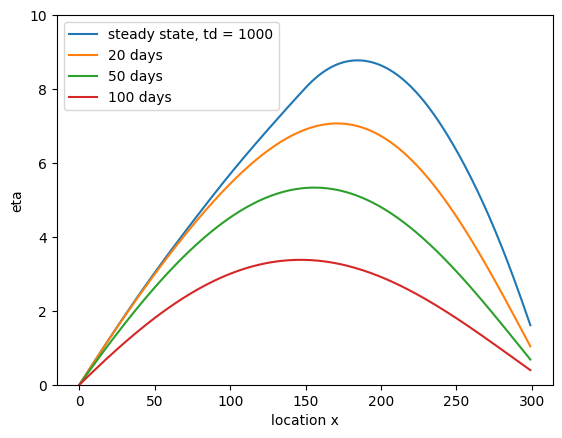

In [319]:
xvals_dimensional = list(map(lambda x: x*300, xvals))

plt.plot(xvals_dimensional, etavals_eq, label = "steady state, td = 1000")
plt.plot(xvals_dimensional, etavals_20days, label = "20 days")
plt.plot(xvals_dimensional, etavals_50days, label = "50 days")
plt.plot(xvals_dimensional, etavals_100days, label = "100 days")
plt.xlabel('location x')
plt.ylabel('eta')
plt.ylim(0, 10)
plt.legend(loc = "upper left")
plt.show()

# I think somehow i should be plotting AFTER "cessation of recharge" as per the Figure 4 description

In [315]:
transcendental_lambda_m

[np.float64(0.0),
 np.float64(3.0141908922324516),
 np.float64(6.032234602815775),
 np.float64(9.05734365933238),
 np.float64(12.091691373107913),
 np.float64(15.136343148209185),
 np.float64(18.19143985530789),
 np.float64(21.256487130816936),
 np.float64(24.33063316458235),
 np.float64(27.41287933192431),
 np.float64(30.50221579508104),
 np.float64(32.986723354233305),
 np.float64(36.12831605463647),
 np.float64(39.269908755039644),
 np.float64(42.41150145544281),
 np.float64(45.55309415584599),
 np.float64(48.694686856249156),
 np.float64(51.836279556652336),
 np.float64(54.977872257055495),
 np.float64(58.119464957458675),
 np.float64(61.26105765786184),
 np.float64(64.402650358265),
 np.float64(67.54424305866819),
 np.float64(70.68583575907137),
 np.float64(73.82742845947455),
 np.float64(76.9690211598777),
 np.float64(80.11061386028086),
 np.float64(83.25220656068404),
 np.float64(86.39379926108722),
 np.float64(89.53539196149038),
 np.float64(92.67698466189356),
 np.float64(95.8

In [320]:
transcendental_lambda_n

[np.float64(0.0),
 np.float64(1.5707963502015858),
 np.float64(4.712389050604758),
 np.float64(7.853981751007929),
 np.float64(10.9955744514111),
 np.float64(14.137167151814271),
 np.float64(17.27875985221744),
 np.float64(20.420352552620617),
 np.float64(23.561945253023783),
 np.float64(26.703537953426963),
 np.float64(29.845130653830125),
 np.float64(32.986723354233305),
 np.float64(36.12831605463647),
 np.float64(39.269908755039644),
 np.float64(42.41150145544281),
 np.float64(45.55309415584599),
 np.float64(48.694686856249156),
 np.float64(51.836279556652336),
 np.float64(54.977872257055495),
 np.float64(58.119464957458675),
 np.float64(61.26105765786184),
 np.float64(64.402650358265),
 np.float64(67.54424305866819),
 np.float64(70.68583575907137),
 np.float64(73.82742845947455),
 np.float64(76.9690211598777),
 np.float64(80.11061386028086),
 np.float64(83.25220656068404),
 np.float64(86.39379926108722),
 np.float64(89.53539196149038),
 np.float64(92.67698466189356),
 np.float64(95